<a href="https://colab.research.google.com/github/SameerAha-007/machine-learning/blob/main/knn_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

df = pd.read_csv("/content/ClassifiedData.csv",index_col=0)
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X_train,X_test,y_train, y_test = train_test_split(scaled_features,
df['TARGET CLASS'], test_size=0.30)

#Initially with K=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)
print("For K=1 results are:")
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
# NOW WITH K=23
knn23 = KNeighborsClassifier(n_neighbors=23)
knn23.fit(X_train,y_train)
pred23 = knn23.predict(X_test)
print("For K=23 results are:")
print(confusion_matrix(y_test,pred23))
print(classification_report(y_test,pred23))

For K=1 results are:
[[144  17]
 [  9 130]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       161
           1       0.88      0.94      0.91       139

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

For K=23 results are:
[[144  17]
 [  7 132]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       161
           1       0.89      0.95      0.92       139

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



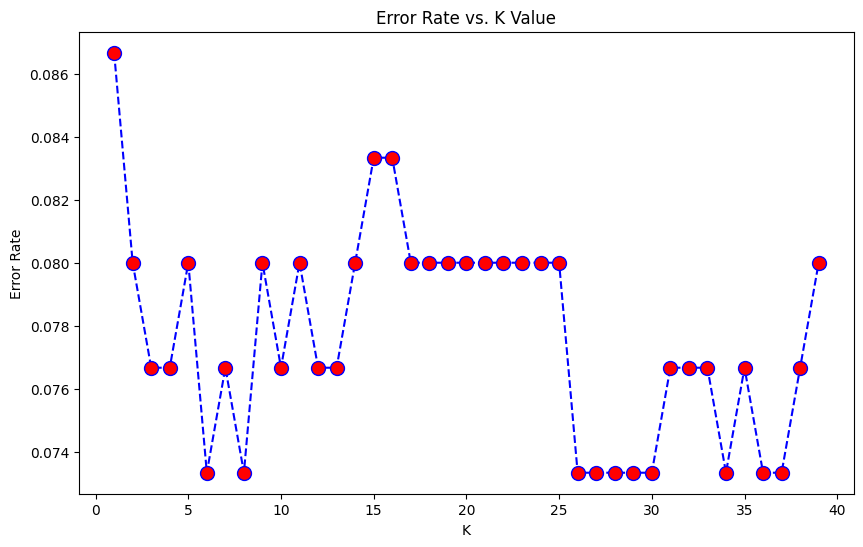

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
